## Business problem

You are a HR department that is seeking a new employee. You have found a good fit for the job and would like to offer the candidate a position in the company. When the question of salary expectations gets raised, the candidate requests 150k as this is what they earnt in their last job.

Is that the case or not? This is the question we are going to answer using a polynomial regression model to predict the previous salary of the candidate.

Lets say we gathered the data from glassdoor and we found from the candidates LinkedIn profile that they were a Region Manager. We can see from the dataset that they would lie between the levels of 6 and 7, lets say 6.5. We can use the value of 6.5 to deploy our model find a prediction for the salary of the candidate and compare this with their requested salary.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


We want to disregard the Position column as we already some ordinal coding in the table - the Level column.

In [16]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [17]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [18]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

Because we have so few data points in our dataset we are going to use the full data set to train our model - we will not be splitting into training and testing. In addition, we will not need to encode any of our data.

## Training the Linear Regression model

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model

In [20]:
from sklearn.preprocessing import PolynomialFeatures

Notice how we use the fit_transform method on X so we have X at degree 2. This is because we want to fit our model, then transform it so it fits our polynomial equation. For the below example we would have our matrix, then our matrix squared.

Then we have to re-fit our linear model on our new matrix, X.

In [21]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

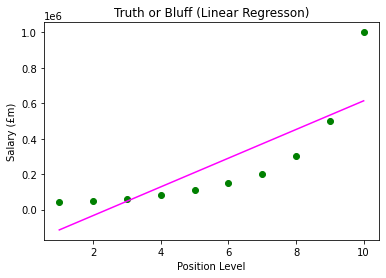

In [22]:
plt.scatter(X, y, color='green')
plt.plot(X, lin_reg.predict(X), color='magenta')
plt.title('Truth or Bluff (Linear Regresson)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£m)')
plt.show()

## Visualising the Polynomial Regression results

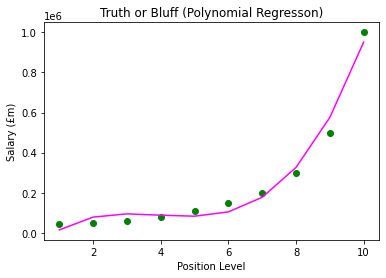

In [23]:
plt.scatter(X, y, color='green')
plt.plot(X, lin_reg_2.predict(X_poly), color='magenta')
plt.title('Truth or Bluff (Polynomial Regresson)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£m)')
plt.show()

We can see our polynomial regression curve fits our data far better than the linear regression curve, especially at n=3. We can always experiment with values of n to find our best fitting model.

## Visualising the Polynomial Regression results for higher resolution & smoother curve

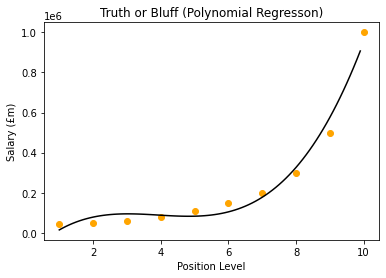

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

X_poly_grid = poly_reg.fit_transform(X_grid)

plt.scatter(X, y, color='orange')
plt.plot(X_grid, lin_reg_2.predict(X_poly_grid), color='black')
plt.title('Truth or Bluff (Polynomial Regresson)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£m)')
plt.show()

We now have a smoother curve. Instead of taking the position level to be integers between 1 and 10, we took real numbers by increments of 0.1.

## Predicting a new result with Linear Regression

Ensure to always use double square brackets as we need to pass through a 2D array.

In [24]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

We need to use our fit_transform method as we need our matrix to the power of n.

In [25]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([133259.46969697])

This does not make sense? This should be around the 150k mark, maybe more?